In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import special
import pandas as pd

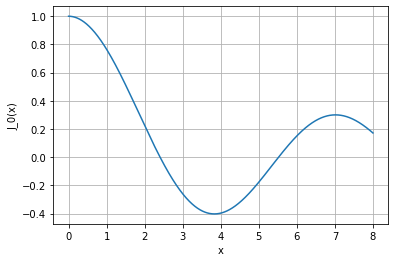

In [13]:
x = np.linspace(0,8,10000)
y = scipy.special.jn(0,x)
plt.plot(x,y)
plt.grid()
plt.xlabel('x')
plt.ylabel("J_0(x)")
plt.show()


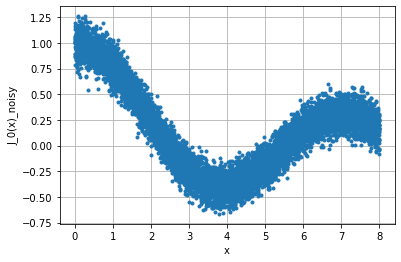

In [15]:
mu, sigma = 0, 0.1 
noise = np.random.normal(mu,sigma,10000)
y_noisy = y + noise
plt.plot(x,y_noisy,".")
plt.grid()
plt.xlabel('x')
plt.ylabel("J_0(x)_noisy")
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

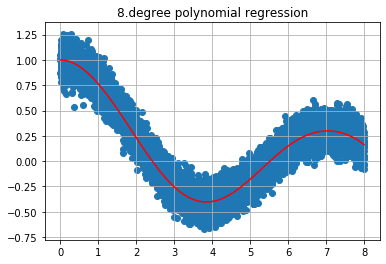

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
degree = 8
polyreg = PolynomialFeatures(degree)
poly_features = polyreg.fit_transform(x.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features,y_noisy)
y_predicted=poly_reg_model.predict(poly_features)
plt.title("8.degree polynomial regression")
plt.scatter(x,y_noisy)
plt.plot(x,y_predicted, c="red")
plt.grid()
plt.show

In [17]:
from sklearn.model_selection import train_test_split

y_collect=np.random.choice(y_noisy,size=10)
x_collect=np.zeros(10)

for i in range(10):
    y=y_collect[i]
    x_collect[i]=np.interp(y,x,y_noisy)


x_train,x_val,y_train,y_val=train_test_split(x_collect,y_collect,test_size=0.2)

x_train = np.array(x_train).reshape(-1,1)
x_val = np.array(x_val).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_val =  np.array(y_val).reshape(-1,1)

In [18]:
### edTest(test_regression) ###
from sklearn.metrics import mean_squared_error
# To iterate over the range, select the maximum degree of the polynomial
degree = 8
# Compute the polynomial features for the current degree 
    # for the train set
x_poly_train = PolynomialFeatures(degree).fit_transform(x_train)

    # Compute the polynomial features for the validation set
x_poly_val = PolynomialFeatures(degree).fit_transform(x_val)
    
    # Initialize a linear regression model
lreg = LinearRegression(fit_intercept=False)

    # Fit the model on the train data
lreg.fit(x_poly_train, y_train)
    
    # Use the trained model to predict on the transformed train data
y_train_pred = lreg.predict(x_poly_train)

    # Use the trained model to predict on the transformed validation data
y_val_pred = lreg.predict(x_poly_val)
    
    # Compute the MSE on the train predictions
training_error=mean_squared_error(y_train, y_train_pred)

    # Compute the MSE on the validation predictions
validation_error=mean_squared_error(y_val, y_val_pred)
    

In [19]:
print("training error: ",training_error)
print("validation error: ",validation_error)

training error:  0.0009442447909216078
validation error:  0.0010340895856482068
